# CNN

### step-1: Load data

##### Fashion MNIST :

- a drop-in replacement for MNIST
- 28\*28 grayscale
- labels: tshirt, shoes, pants etc.

##### CIFAR-10

- 32\*32\*3 color images
- labels: automobile, horse, frog, cat, dog etc.

#### CNN functional API

```py
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)
```

![convolution](images/convolution.JPG)

##### Why not using `droput` layer?

As we know, CNN is pattern finder. So if some of pixels removed from the picture, it's not a good idea

In [3]:
import tensorflow as tf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

In [5]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

### Load MNIST data

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train/255.0, X_test/255.0
print(f"X_train.shape: {X_train.shape}")

X_train.shape: (60000, 28, 28)


In [12]:
# look the first image
print(f"shape: {X_train[0].shape}, dimension: {X_train[0].ndim}")

shape: (28, 28), dimension: 2


In [13]:
# each image is 2D -> height * width = 28 * 28
# convolution expects 3D -> height * width * color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(f"X_train.shape: {X_train.shape}")

X_train.shape: (60000, 28, 28, 1)


In [15]:
# number of classes
K = len(np.unique(y_train))
print(f"number of classes: {K}")

number of classes: 10


### Build the model

In [16]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

### compile and fit

In [17]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.5249 - accuracy: 0.8065 - val_loss: 0.4011 - val_accuracy: 0.8467
Epoch 2/15
60000/60000 [==============================] - 48s 808us/sample - loss: 0.3672 - accuracy: 0.8615 - val_loss: 0.3457 - val_accuracy: 0.8715
Epoch 3/15
60000/60000 [==============================] - 49s 810us/sample - loss: 0.3189 - accuracy: 0.8791 - val_loss: 0.3310 - val_accuracy: 0.8781
Epoch 4/15
60000/60000 [==============================] - 50s 831us/sample - loss: 0.2856 - accuracy: 0.8925 - val_loss: 0.3181 - val_accuracy: 0.8827
Epoch 5/15
60000/60000 [==============================] - 47s 779us/sample - loss: 0.2574 - accuracy: 0.9025 - val_loss: 0.3021 - val_accuracy: 0.8905
Epoch 6/15
60000/60000 [==============================] - 47s 787us/sample - loss: 0.2364 - accuracy: 0.9094 - val_loss: 0.3037 - val_accuracy: 0.8910
Epoch 7/15
60000/60000 [======================

In [52]:
r.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

### plot loss per iteration

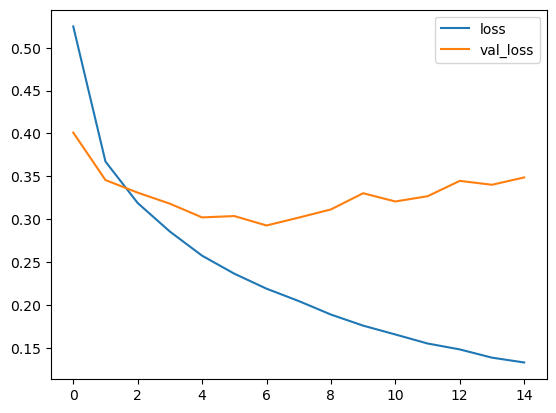

In [18]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

### plot accuracy per iteration

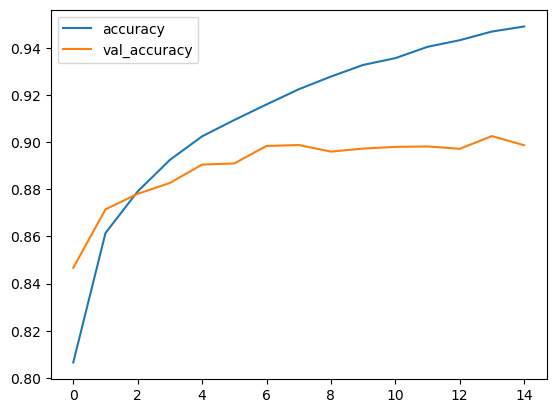

In [19]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

#### Label mapping

| Label | Description |
|:---:|:---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

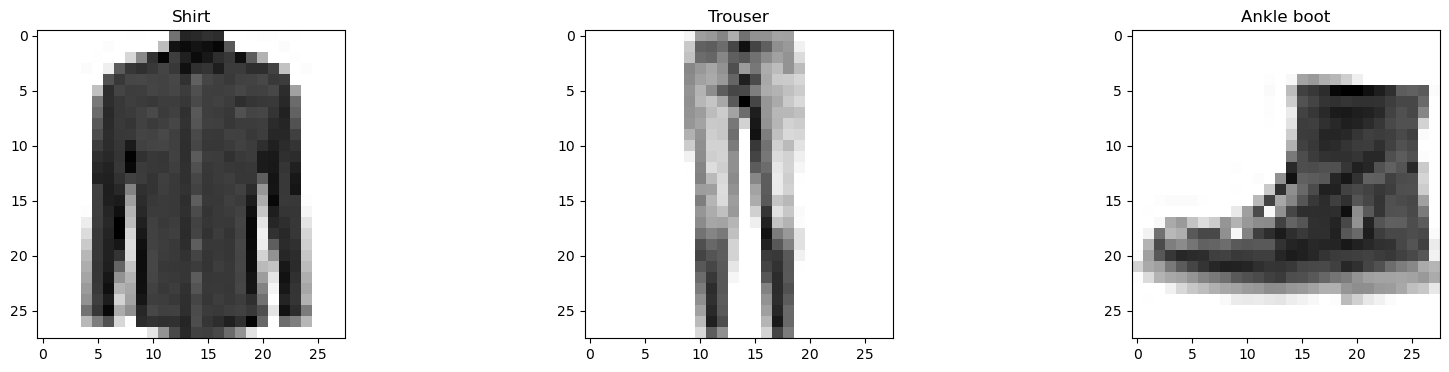

In [26]:
fix, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

idx = np.random.randint(0, X_train.shape[0])
ax1.imshow(X_train[idx].reshape(28, 28), cmap=plt.cm.binary)
ax1.set(title=f"{class_names[y_train[idx]]}")

idx = np.random.randint(0, X_train.shape[0])
ax2.imshow(X_train[idx].reshape(28, 28), cmap=plt.cm.binary)
ax2.set(title=f"{class_names[y_train[idx]]}")

idx = np.random.randint(0, X_train.shape[0])
ax3.imshow(X_train[idx].reshape(28, 28), cmap=plt.cm.binary)
ax3.set(title=f"{class_names[y_train[idx]]}");

#### misclassified images

In [39]:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

In [31]:
y_pred[0]

array([2.2557550e-14, 3.7521641e-18, 5.4092286e-15, 2.5327000e-17,
       6.7369517e-16, 8.1775409e-10, 1.2797271e-15, 8.4646984e-11,
       3.1023611e-16, 1.0000000e+00], dtype=float32)

In [40]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [42]:
missclassified_idx = np.where(y_pred != y_test)
len(missclassified_idx[0])

1013

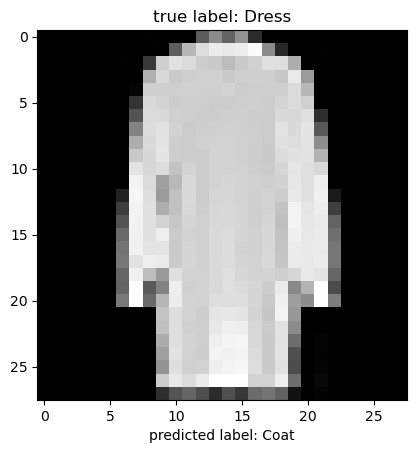

In [46]:
i = np.random.choice(missclassified_idx[0])
plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
plt.title(f"true label: {class_names[y_test[i]]}")
plt.xlabel(f"predicted label: {class_names[y_pred[i]]}");